In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date

## Names and Palette ##

In [2]:
today = date.today()
print("Today's date:", today)
date = str(today)
date

Today's date: 2022-09-01


'2022-09-01'

In [3]:
tubulin = '[Tubulin] ' r'$(\mu M)$'
tub = 'tub'

DCXconc = '[DCX] ' r'$(n M)$'
DCX = 'DCX'
Type = 'DCX Type'

Concentration = 'Concentration ' r'$(\mu M)$'
Length = 'Length ' r'$(\mu m)$'
Lifetime = 'Lifetime ' r'$(min)$'
GrowthRate = 'Growth Rate ' r'$(\mu m / min)$'
TimeToNucleate = 'Time to Nucleate ' r'$(min)$'
ShrinkageLength = 'Shrink Length ' r'$(\mu m)$'
ShrinkageLifetime = 'Shrink Lifetime ' r'$(min)$'
ShrinkageRate = 'Shrink Rate ' r'$(\mu m / min)$'

In [4]:
Type_order = ['None', 'WT', 'Y64N','R76S','R102S', 'R178L', 'P191R', 'G223E','R303X']
category_Type = CategoricalDtype(Type_order, ordered=True,) #order mutants

In [5]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))
print(DC1color,DC2color)

palette = [grey,cyan] + list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green]
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]

[<Color #ab4a9c>, <Color #e468b8>, <Color #ffa4cd>] [<Color #ff5b00>, <Color #ff8341>, <Color #ffac83>]


## Join Data ##

In [ ]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [55]:
files = [x for x in path.iterdir() if x.is_file()]
files = [i for i in files if (str(i)[-10:] != 'results.csv') == True]
files = [i for i in files if (str(i)[-3:] == 'csv') == True]
files

[WindowsPath('C:/Users/Brouhard Lab/Data/Growth curve data/Join_Data/2022-08-05_dynamics_Ch1-tub10uM_results.csv'),
 WindowsPath('C:/Users/Brouhard Lab/Data/Growth curve data/Join_Data/2022-08-12_dynamics_Ch3-tub10uM_results.csv'),
 WindowsPath('C:/Users/Brouhard Lab/Data/Growth curve data/Join_Data/2022-08-12_dynamics_Ch4-tub10uM_results.csv'),
 WindowsPath('C:/Users/Brouhard Lab/Data/Growth curve data/Join_Data/2022-08-19_dynamics_Ch1-tub06uM_results.csv'),
 WindowsPath('C:/Users/Brouhard Lab/Data/Growth curve data/Join_Data/2022-08-19_dynamics_Ch3-tub06uM_results.csv'),
 WindowsPath('C:/Users/Brouhard Lab/Data/Growth curve data/Join_Data/2022-08-19_dynamics_Ch4-tub06uM_results.csv')]

In [56]:
data = pd.read_csv(files[0], encoding='utf-8')
for i in range(1,len(files)):
    d = pd.read_csv(files[i], encoding='utf-8')
    data = data.append(d, ignore_index=True)
data[Type].unique()

C:\Users\Brandi\AppData\Local\Temp\ipykernel_14528\2331887453.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
C:\Users\Brandi\AppData\Local\Temp\ipykernel_14528\2331887453.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
C:\Users\Brandi\AppData\Local\Temp\ipykernel_14528\2331887453.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
C:\Users\Brandi\AppData\Local\Temp\ipykernel_14528\2331887453.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(d, ignore_index=True)
C:\Users\Brandi\AppData\

array(['None'], dtype=object)

In [58]:
#data[Type] = data[Type].astype(category_Type)
#data = data.sort_values(by=[Type, DCXconc])
#FIX CONCENTRATION
#data[DCXconc] = data[DCXconc].apply(lambda x: round(x*2.27))
#np.sort(data[DCXconc].unique())

In [59]:
data

,Date,Investigator,Ch,[Tubulin] $(\mu M)$,[DCX ] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues,DCX Type,[DCX] $(n M)$
8,2022-08-12,Brandi,3,10,NaN,1.17105,1.255333,0.932860,6.859500,1.044450,NaN,NaN,False,None,0.0
9,2022-08-12,Brandi,3,10,NaN,5.91855,8.204500,0.721379,10.804833,5.918550,0.269000,22.002045,False,None,0.0
10,2022-08-12,Brandi,3,10,NaN,2.31045,2.241667,1.030684,0.829417,2.516175,0.112083,22.449145,False,None,0.0
11,2022-08-12,Brandi,3,10,NaN,0.91785,1.165667,0.787403,2.331333,0.886200,0.044833,19.766543,False,None,0.0
12,2022-08-12,Brandi,3,10,NaN,0.94950,1.210500,0.784387,6.411167,1.012800,0.134500,7.530112,False,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2022-08-05,Brandi,1,10,0.0,1.23050,4.350667,0.282830,0.711167,0.642000,0.083667,7.673307,True,None,NaN
4,2022-08-05,Brandi,1,10,0.0,8.45300,8.785000,0.962208,2.844667,8.667000,0.334667,25.897410,False,None,NaN
5,2022-08-05,Brandi,1,10,0.0,8.88100,10.793000,0.822848,3.095667,8.774000,0.418333,20.973705,False,None,NaN
6,2022-08-05,Brandi,1,10,0.0,21.40000,22.088000,0.968852,7.530000,22.149000,0.585667,37.818441,True,None,NaN


In [60]:
data.to_csv(path/(date+'_MasterSheet.csv'), encoding='utf-8', index=False)

## Open data if already saved ##

In [64]:
askmastersheet = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
data = pd.read_csv(askmastersheet, encoding='utf-8')
data

,Date,Investigator,Ch,[Tubulin] $(\mu M)$,[DCX ] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues,DCX Type,[DCX] $(n M)$
0,2022-08-12,Brandi,3,10,NaN,1.17105,1.255333,0.932860,6.859500,1.044450,NaN,NaN,False,None,0.0
1,2022-08-12,Brandi,3,10,NaN,5.91855,8.204500,0.721379,10.804833,5.918550,0.269000,22.002045,False,None,0.0
2,2022-08-12,Brandi,3,10,NaN,2.31045,2.241667,1.030684,0.829417,2.516175,0.112083,22.449145,False,None,0.0
3,2022-08-12,Brandi,3,10,NaN,0.91785,1.165667,0.787403,2.331333,0.886200,0.044833,19.766543,False,None,0.0
4,2022-08-12,Brandi,3,10,NaN,0.94950,1.210500,0.784387,6.411167,1.012800,0.134500,7.530112,False,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2022-08-05,Brandi,1,10,0.0,1.23050,4.350667,0.282830,0.711167,0.642000,0.083667,7.673307,True,None,NaN
174,2022-08-05,Brandi,1,10,0.0,8.45300,8.785000,0.962208,2.844667,8.667000,0.334667,25.897410,False,None,NaN
175,2022-08-05,Brandi,1,10,0.0,8.88100,10.793000,0.822848,3.095667,8.774000,0.418333,20.973705,False,None,NaN
176,2022-08-05,Brandi,1,10,0.0,21.40000,22.088000,0.968852,7.530000,22.149000,0.585667,37.818441,True,None,NaN


In [65]:
pathmastersheet = Path(askmastersheet)
resultdirectory = str(pathmastersheet.parents[0])+'//Plots'
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
path = newmydir
path

WindowsPath('C:/Users/Brouhard Lab/Data/Growth curve data/Join_Data/Plots')

## Seaborn plot #

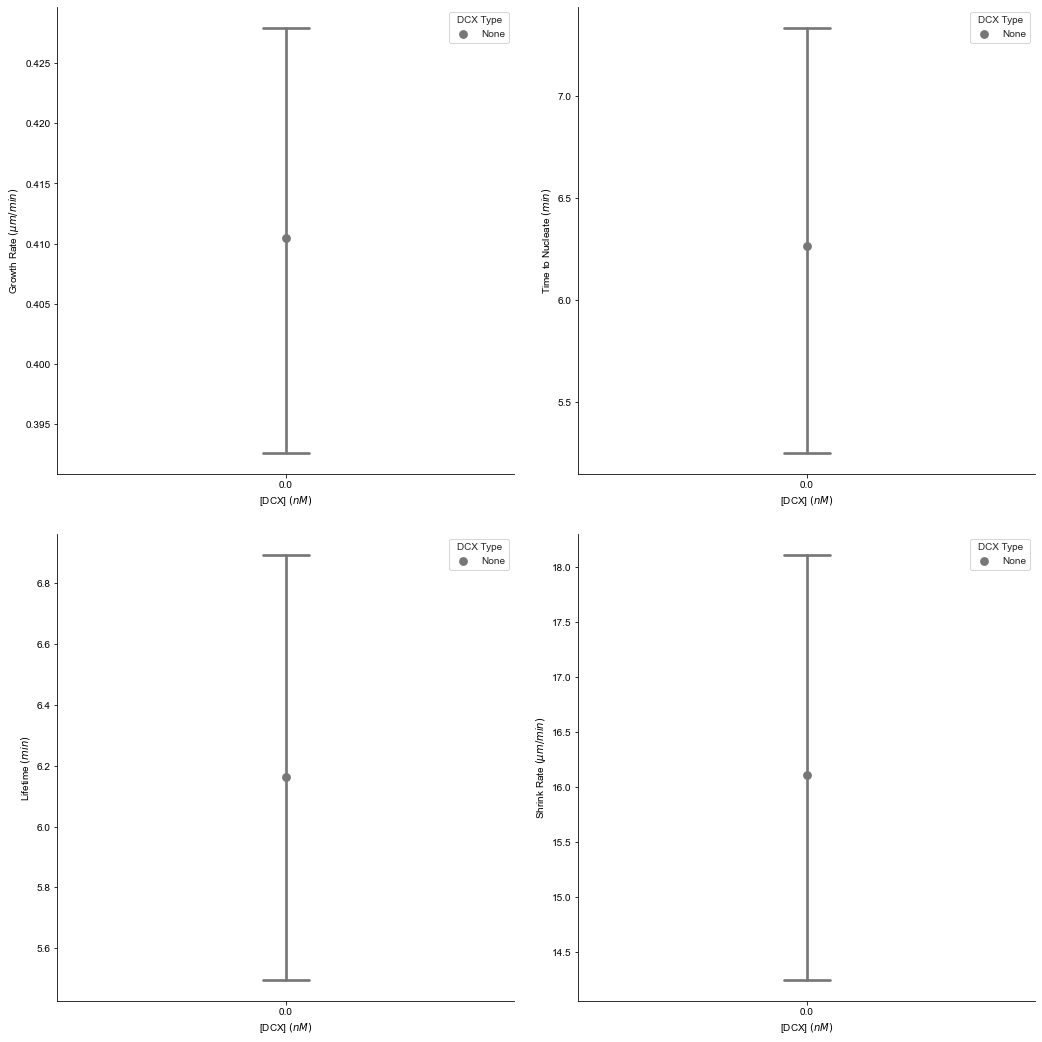

In [66]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x=DCXconc, y=parameters[c],
                        hue=Type, err_style="bars", marker='o', join=False, capsize=.1,
                        data=data[ (data[tubulin]==6)],err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
        
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
plt.savefig(path/('tub6uM_DCX-variable'+date+'.pdf'))
plt.savefig(path/('tub6uM_DCX-variable'+date+'.png'))

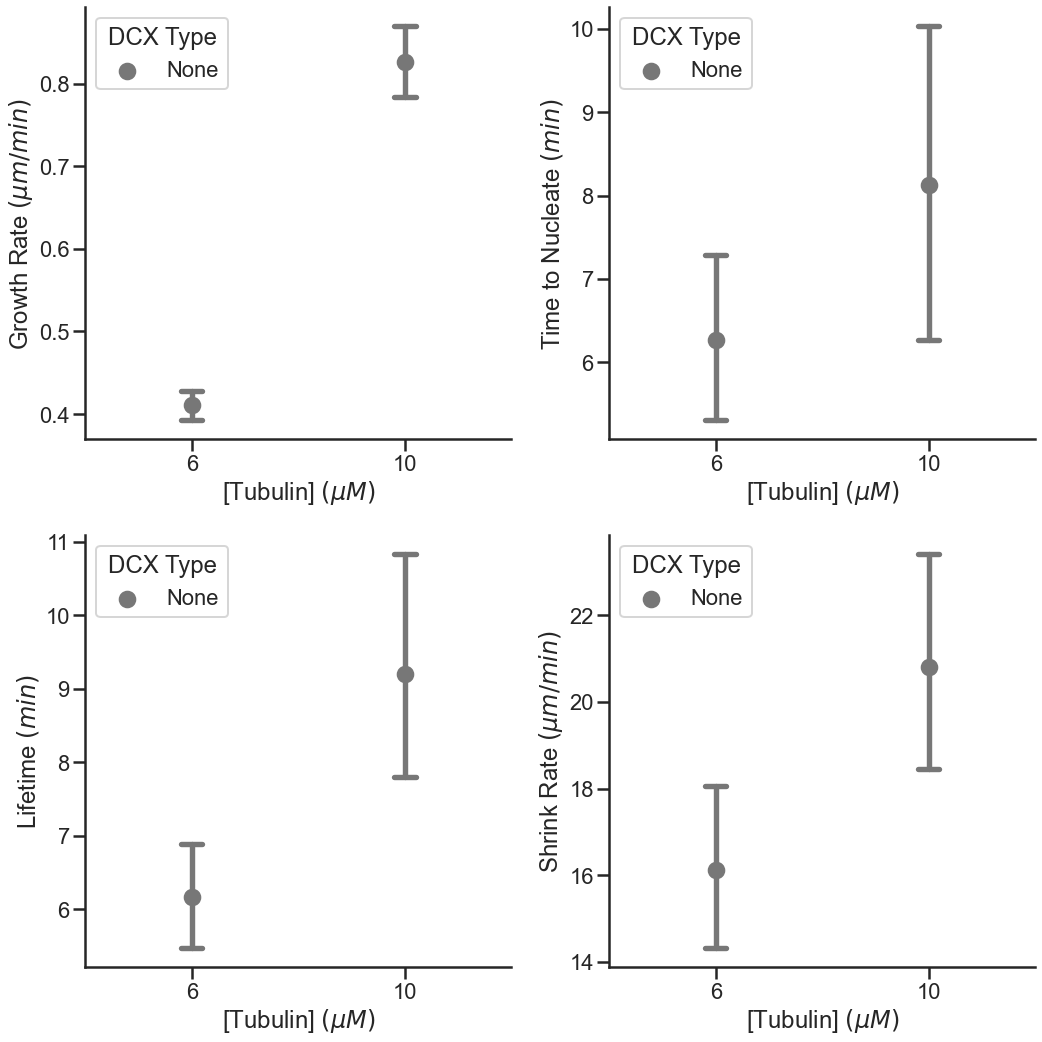

In [67]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x=tubulin, y=parameters[c],
                        hue=Type, style = DCXconc , err_style="bars", marker='o', join=False, capsize=.1,
                        data=data,err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
        
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
plt.savefig(path/('plots'+date+'.pdf'))
plt.savefig(path/('plots'+date+'.png'))

# Fitting Data #

In [68]:
def gaussian(x, mu, sig):
    return (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) )/(sig*np.sqrt(2*np.pi))

def exponential(x, scale):
    return ((np.exp(-x/scale) )/(scale))

def gamma(x, shape, scale):
    return (np.power(x,shape-1)*np.exp(-x/ scale))/(sp.special.gamma(shape) * np.power(scale,shape))


In [69]:
def make_hist(data, parameter, tubconc, dcxtype, dcxconc) :
    
    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)]
    
    if parameter == GrowthRate :
        maxbin = 1.5
        binsize = 0.05
#     elif parameter == ShrinkageRate :
#         maxbin = 15
#         binsize = 0.1
    else:
        maxbin = 30
        binsize = 1
        
    n, bins, patches = plt.hist(selectdata[parameter], bins=np.arange(0, maxbin + binsize, binsize), density=True);
    plt.clf()
       
    return n, bins

In [70]:
def equation_fit(data, parameter):
    
    if (parameter ==  GrowthRate) | (parameter == ShrinkageRate) :
        equation = gaussian
    elif parameter == TimeToNucleate :
        equation = exponential
    elif parameter == Lifetime :
        equation = gamma
        
    results = pd.DataFrame(columns=[] , index=[])
    
    for tubconc in data[tubulin].unique():
        for dcxtype in data[Type].unique():
            for dcxconc in data[DCXconc].unique():
                
                n, bins =  make_hist(data, parameter, tubconc, dcxtype, dcxconc)      
                
                if np.isnan(np.sum(n)) == True:
                    continue

                if equation == gamma :
                    coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n,[2,1])
                else :
                    coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n)

                variance = np.diagonal(var_matrix) #Refer [3]
                SE = np.sqrt(variance) #Refer [4]

            #======Making a data frame========
                results0 = pd.DataFrame(columns=[] , index=[])
                for k in np.arange(0,len(coeff)):
                    header = [np.array([parameter]),np.array(['Coefficient '+ str(k)])]
                    r0 = pd.DataFrame([coeff[k],SE[k]], index=(['Value','SE']),columns= header)
                    results0 = pd.concat([results0, r0], axis=1, sort=False)

                results0[tubulin] = tubconc
                results0[Type] = dcxtype
                results0[DCXconc] = dcxconc

                results = pd.concat([results, results0], sort=False)

    return results

In [71]:
newmydir = path/(date+'_fitdata')
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('C:/Users/Brouhard Lab/Data/Growth curve data/Join_Data/Plots/2022-08-29_fitdata')

In [72]:
GrowthRateFit = equation_fit(data, GrowthRate);
TimeToNucleateFit = equation_fit(data, TimeToNucleate);
LifetimeFit = equation_fit(data, Lifetime);
ShrinkageRateFit = equation_fit(data, ShrinkageRate);

C:\Users\Brandi\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\Brandi\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\Brandi\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\Brandi\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\Brandi\AppData\Local\Temp\ipykernel_14528\2256907929.py:8: RuntimeWarning: divide by zero encountered in power
  return (np.power(x,shape-1)*np.exp(-x/ scale))/(sp.special.gamma(shape) * np.power(scale,shape))
C:\Users\Brandi\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide

<Figure size 432x288 with 0 Axes>

In [73]:
GrowthRateFit = GrowthRateFit.rename(columns={'Coefficient 0': 'Mean'})
TimeToNucleateFit = TimeToNucleateFit.rename(columns={'Coefficient 0': 'Mean'})
ShrinkageRateFit = ShrinkageRateFit.rename(columns={'Coefficient 0': 'Mean'})

LifetimeCoeff0 = LifetimeFit[Lifetime]['Coefficient 0'].loc['Value'].values
LifetimeCoeff1 = LifetimeFit[Lifetime]['Coefficient 1'].loc['Value'].values
LifetimeSE0 = LifetimeFit[Lifetime]['Coefficient 0'].loc['SE'].values
LifetimeSE1 = LifetimeFit[Lifetime]['Coefficient 1'].loc['SE'].values
LifetimeMean = LifetimeCoeff0*LifetimeCoeff1
LifetimeSE = LifetimeCoeff0*LifetimeSE1 + LifetimeCoeff1*LifetimeSE0

LifetimeMeanDF = pd.DataFrame(columns=[] , index=[])
header = [np.array([Lifetime]),np.array(['Mean'])]  
for i in np.arange(0,len(LifetimeMean)):
    r0 = pd.DataFrame([LifetimeMean[i],LifetimeSE[i]], index=(['Value','SE']),columns= header)
    LifetimeMeanDF = pd.concat([LifetimeMeanDF, r0], sort=False)

ResultFit = pd.concat([GrowthRateFit, TimeToNucleateFit,LifetimeFit,LifetimeMeanDF,ShrinkageRateFit], axis=1, sort=False)
ResultFit = ResultFit.loc[:,~ResultFit.columns.duplicated()]

ResultFit.to_csv(newmydir/('ResultFit_'+date+'.csv'), encoding='utf-8', index=False)
ResultFit

Growth Rate $(\mu m / min)$               [Tubulin] $(\mu M)$ DCX Type  \
                             Mean Coefficient 1                                
Value                    0.798786      0.100524                  10     None   
SE                       0.010161      0.008296                  10     None   
Value                    0.376201      0.092457                   6     None   
SE                       0.003535      0.002887                   6     None   

      [DCX] $(n M)$ Time to Nucleate $(min)$ Lifetime $(min)$                \
                                        Mean    Coefficient 0 Coefficient 1   
Value           0.0                10.893828         1.191578      8.210460   
SE              0.0                 1.887873         0.274483      2.738729   
Value           0.0                 6.538502         3.233589      1.456573   
SE              0.0                 0.604885         0.375922      0.198374   

                Shrink Rate $(\mu m / min)$                
           Mean                        Mean Coefficient 1  
Value  9.783405                   17.867402      5.719026  
SE     5.517038                    1.079664      0.893704  
Value  4.709960                   11.250808      5.025806  
SE     1.189016                    0.532141      0.437316

#  PLOT DATA  #

In [74]:
def filter_variable(variable, filtername, filtervalue,data):  
    x = data[data[filtername] == filtervalue][variable].loc['Value']
    if isinstance(x, (np.ndarray)) == True :
        x = x.values
    return x

def filter_parameter(parameter, moment , filtername, filtervalue, value,data):  
    x = data[data[filtername] == filtervalue][parameter][moment].loc[value]
    if isinstance(x, (np.ndarray)) == True  :
        x = x.values
    return x

In [75]:
# plottypes = np.concatenate((data[Type].unique()[:2],data[Type].unique()[5:-1]), axis=None)
# palette = np.concatenate((palette[:2],palette[5:-1]), axis=None)

# plottypes,palette

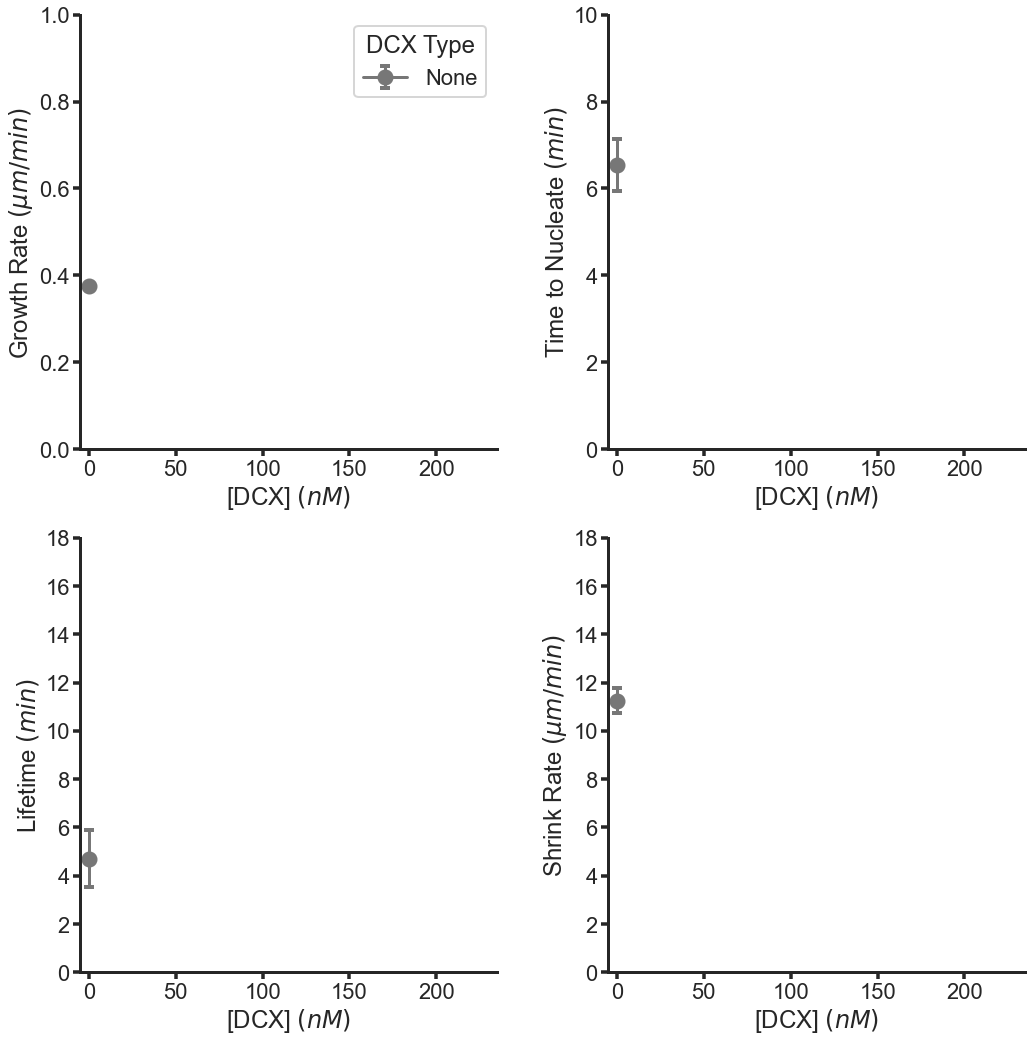

In [76]:
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shronkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

scattersize = 12
cap = 5

fig, ax = plt.subplots(2,2,figsize=(15,15))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
for dcxtype in data[Type].unique(): #data[Type].unique() #plottypes

    x = filter_variable(DCXconc, Type, dcxtype,ResultFit[ResultFit[tubulin]==6])
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):

            y = filter_parameter(parameters[c], 'Mean' , Type, dcxtype , 'Value',ResultFit[ResultFit[tubulin]==6])
            yerr = filter_parameter(parameters[c], 'Mean' , Type, dcxtype , 'SE', ResultFit[ResultFit[tubulin]==6])

            ax[i][j].errorbar(x , y , yerr= yerr , fmt='',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count])

            c += 1
    count += 1

ax[0][0].set_ylim(0,1)
ax[1][0].set_ylim(0,18)
ax[0][1].set_ylim(0,10)
ax[1][1].set_ylim(0,18)

count = 0
for i in np.arange(len(ax)):
    for j in np.arange(len(ax)):
    
        ax[i][j].set_xlim(-5,235)
        ax[i][j].set_xlabel(DCXconc)
        ax[i][j].set_xticks(np.arange(0, 235, 50))
        ax[i][j].set_ylabel(ylables[count])
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['left'].set_lw(3)
        ax[i][j].spines['bottom'].set_lw(3)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
        #ax[i][1].legend((Type_order),loc='upper right',title='DCX Type')
        #ax[i][j].set_title(titles[count])
        
        count += 1

ax[0][0].legend((Type_order),loc='upper right',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')
plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsFit_ctetubulin_all_'+date+'.pdf'))

In [77]:
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Correlation')
ylables = (GrowthRate,TimeToNucleate,Lifetime,TimeToNucleate)

scattersize = 12
cap = 5

fig, ax = plt.subplots(2,2,figsize=(15,15))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
for dcxtype in data[Type].unique()[]:
    
    x = filter_variable(tubulin, Type, dcxtype,ResultFit)
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
            
            if i == j == 1:
             continue

            y = filter_parameter(parameters[c], 'Mean' , Type, dcxtype , 'Value',ResultFit)
            yerr = filter_parameter(parameters[c], 'Mean' , Type, dcxtype , 'SE', ResultFit)

            ax[i][j].errorbar(x , y , yerr= yerr , fmt='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count])
            c += 1
    
    ax[1][1].errorbar(filter_parameter(Lifetime, 'Mean' , Type, dcxtype , 'Value',ResultFit), filter_parameter(TimeToNucleate, 'Mean' , Type, dcxtype , 'Value',ResultFit),
                      xerr=filter_parameter(Lifetime, 'Mean' , Type, dcxtype , 'SE',ResultFit), yerr=filter_parameter(TimeToNucleate, 'Mean' , Type, dcxtype , 'SE',ResultFit),
                      markeredgewidth=4,elinewidth=3,fmt='o', markersize=scattersize,capsize = cap,color=palette[count])
    
    count += 1

ax[0][0].set_ylim(0,1.5)
ax[1][0].set_ylim(0,18)
ax[0][1].set_ylim(0,10)
ax[1][1].set_ylim(0,8)

count = 0
for i in np.arange(len(ax)):
    for j in np.arange(len(ax)):
    
        ax[i][j].set_xlim(0,16)
        ax[i][j].set_xlabel(tubulin)
        ax[i][j].set_xticks(np.arange(0, 16, 2))
        ax[i][j].set_ylabel(ylables[count])
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['left'].set_lw(3)
        ax[i][j].spines['bottom'].set_lw(3)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
        #ax[i][1].legend(('None','WT','P191R'),loc='upper right',title='DCX Type')
        #ax[i][j].set_title(titles[count])
        
        count += 1

ax[1][1].set_xlim(0,15)
ax[1][1].set_xlabel(Lifetime)
ax[1][1].set_xticks(np.arange(0, 16, 2))


plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsFit_corr_'+date+'.pdf'))

SyntaxError: invalid syntax (36501271.py, line 12)

# Histogram #

In [78]:
def plot_hist(data, tubconc, dcxtype, dcxconc,color) :
    
    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)]
    fig, ax = plt.subplots(2,2,figsize=(15,15))
    
    n = len(selectdata.dropna().index)
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
            parameter = parameters[c]

            if parameter == GrowthRate :
                maxbin = 1.5
                binsize = 0.025
#             elif parameter == ShrinkageRate :
#                 maxbin = 25
#                 binsize = 0.5
            else:
                maxbin = 30
                binsize = 0.5

            ax[i][j].hist(selectdata[parameter], bins=np.arange(0, maxbin + binsize, binsize), 
                          density=True,color = color,alpha = 0.5);
            ax[i][j].set_xlabel(parameter)
            ax[i][j].set_ylabel('Probability')
            ax[1][1].set_xlim(0,maxbin)
            ax[i][j].spines['right'].set_visible(False)
            ax[i][j].spines['top'].set_visible(False)
            ax[i][j].spines['left'].set_lw(3)
            ax[i][j].spines['bottom'].set_lw(3)
            
            c += 1
    
    selectcoeff = ResultFit[ResultFit[tubulin]==tubconc]
    
    x = np.arange(0, 1.5 + 0.025, 0.025)
    mu = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[0]]['Mean'].loc['Value']
    sig = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[0]]['Coefficient 1'].loc['Value']
    ax[0][0].plot(x, gaussian(x, mu, sig),color = color, lw=4);
    
    x = np.arange(0, 30 + 0.5, 0.5)
    scale = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[1]]['Mean'].loc['Value']
    ax[0][1].plot(x, exponential(x, scale),color = color, lw=4);
    
    shape = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[2]]['Coefficient 0'].loc['Value']
    scale = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[2]]['Coefficient 1'].loc['Value']
    ax[1][0].plot(x, gamma(x, shape, scale),color = color, lw=4);
            
    mu = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[3]]['Mean'].loc['Value']
    sig = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[3]]['Coefficient 1'].loc['Value']
    ax[1][1].plot(x, gaussian(x, mu, sig),color = color, lw=4);
    
    legnd = str(dcxconc)+' nM'
    ax[0][1].legend(('Fit',legnd),loc='upper right',title='DCX: '+dcxtype)
    #ax[1][0].legend(('Fit',legnd),loc='upper right',title='DCX: '+dcxtype)
    
    #plt.savefig(newmydir/('joint_graphsHIST-'+dcxtype+'-'+str(dcxconc)+'.pdf'))
    
    return print(n)

C:\Users\Brandi\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


KeyError: 'Value'

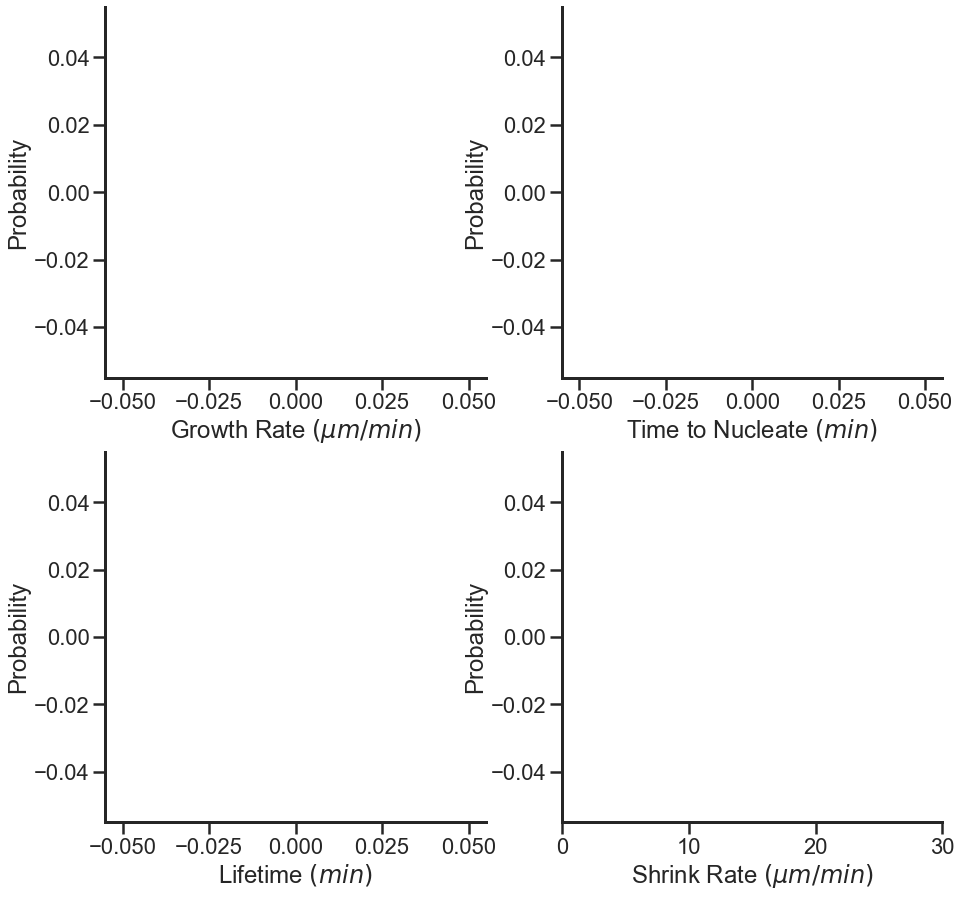

In [79]:
plot_hist(data, 6, 'WT', 114,cyan)


# Rescues #

In [47]:
def rescue_count(data):
    
    results = pd.DataFrame(columns=[] , index=[])
    
    data.loc[pd.isnull(data[GrowthRate]), ['Rescues']] = np.NaN
    
    for tubconc in data[tubulin].unique():
        for dcxtype in data[Type].unique():
            for dcxconc in data[DCXconc].unique():
                
                selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)]
                n =  selectdata['Rescues'].count()
                
                if n == 0:
                    continue
                    
                rv = selectdata['Rescues'].dropna().value_counts(normalize = True).to_frame()
                rescue_values = 1-rv.loc[0][0]
                

            #======Making a data frame========
                r0 = {tubulin:[tubconc], Type:[dcxtype], DCXconc:[dcxconc], 'Normalized Rescue': [rescue_values],
                     'n': [n]}
                results0 = pd.DataFrame(data=r0)
                results = pd.concat([results, results0], sort=False)

    return results

In [48]:
rescues = rescue_count(data)
rescues

,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,Normalized Rescue,n
0,12.0,None,0,0.047619,105
0,8.0,None,0,0.031250,32
0,6.0,None,0,0.009756,615
0,6.0,WT,32,0.128114,281
0,6.0,WT,57,0.349345,229
0,6.0,WT,79,0.681564,179
0,6.0,WT,114,0.860987,223
0,6.0,WT,227,0.935714,280
0,6.0,Y64N,32,0.000000,209
0,6.0,Y64N,57,0.034615,260


In [104]:
# plottypes = np.concatenate((data[Type].unique()[:2],data[Type].unique()[5:-1]), axis=None)
# palette = np.concatenate((palette[:2],palette[5:-1]), axis=None)

# plottypes,palette

(array(['None', 'WT', 'R178L', 'P191R', 'G223E'], dtype=object),
 array(['#777777', '#0089CF', '#ff5b00', '#fca217', '#f9dc2d'], dtype='<U7'))

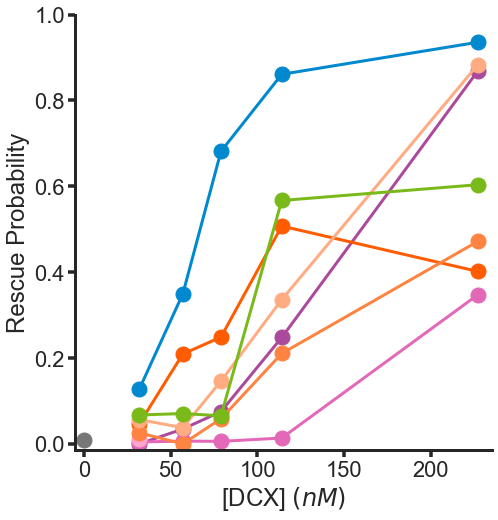

In [76]:
scattersize = 12
cap = 5

fig, ax = plt.subplots(1,1,figsize=(7.45,7.75))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
for dcxtype in data[Type].unique(): #data[Type].unique()

    x = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)][DCXconc]

    y = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)]['Normalized Rescue']

    ax.plot(x , y ,color=palette[count],marker = 'o', ms=15)
    count += 1

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
ax.set_ylim(-0.015,1)
ax.set_xlim(-5,235)
ax.set_xlabel( DCXconc)


#ax.set_title('Rescue')
ax.set_ylabel('Rescue Probability')


#ax.legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')
plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsRescues_all.pdf'))

# Lifetime Parameters #

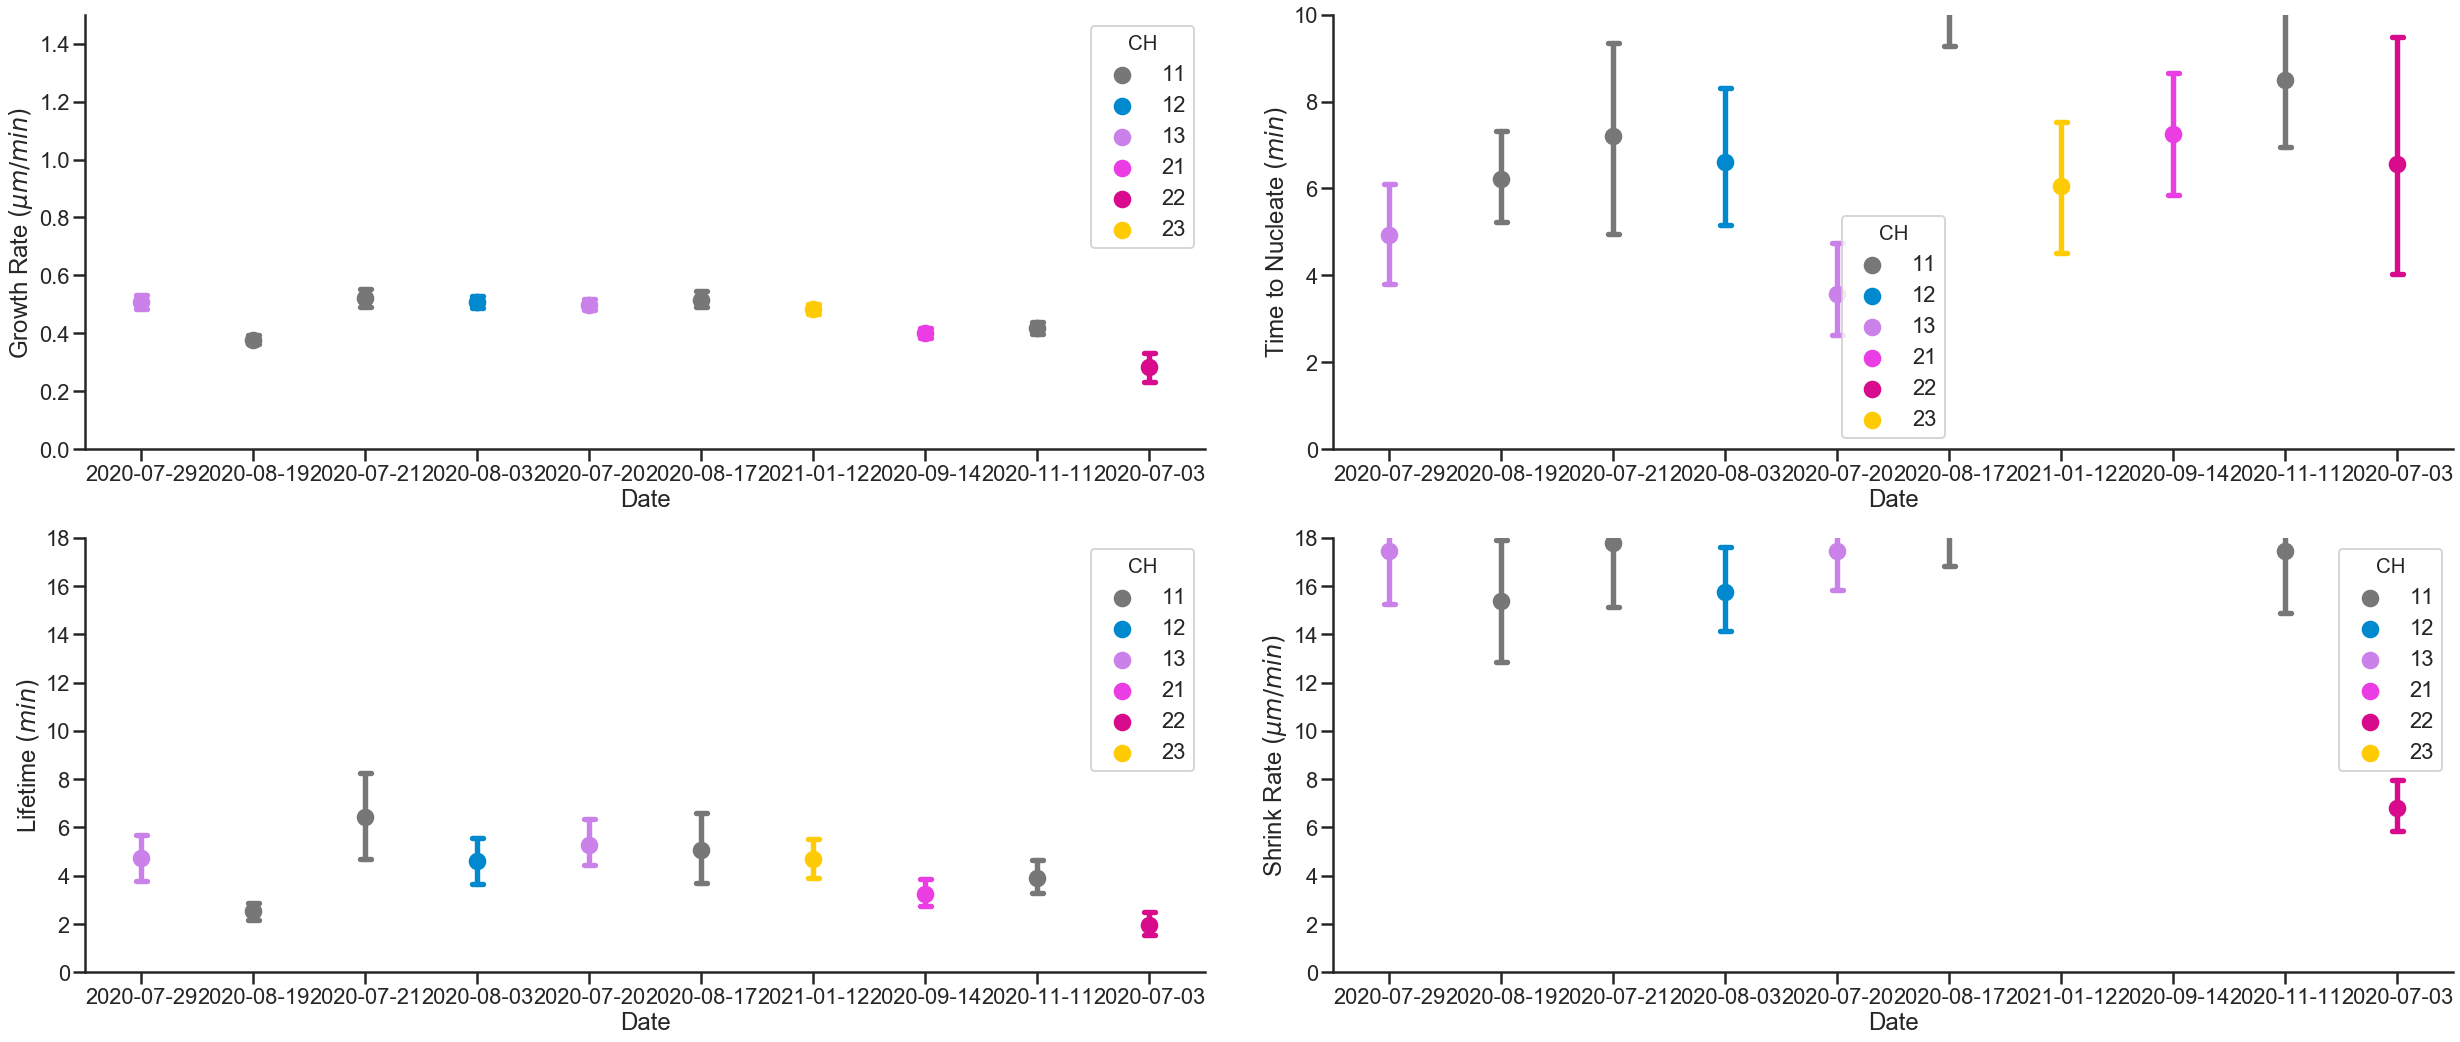

In [43]:
 selectdata = data[(data[tubulin]==6)&(data[Type]=='None')&(data[DCXconc]==0)]

fig, axs = plt.subplots(2,2,figsize=(35,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x='Date', y=parameters[c],
                        hue='CH', err_style="bars", marker='o', join=False, capsize=.1,
                        data=selectdata,err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
axs[0][0].set_ylim(0,1.5)
axs[1][0].set_ylim(0,18)
axs[0][1].set_ylim(0,10)
axs[1][1].set_ylim(0,18)       
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()


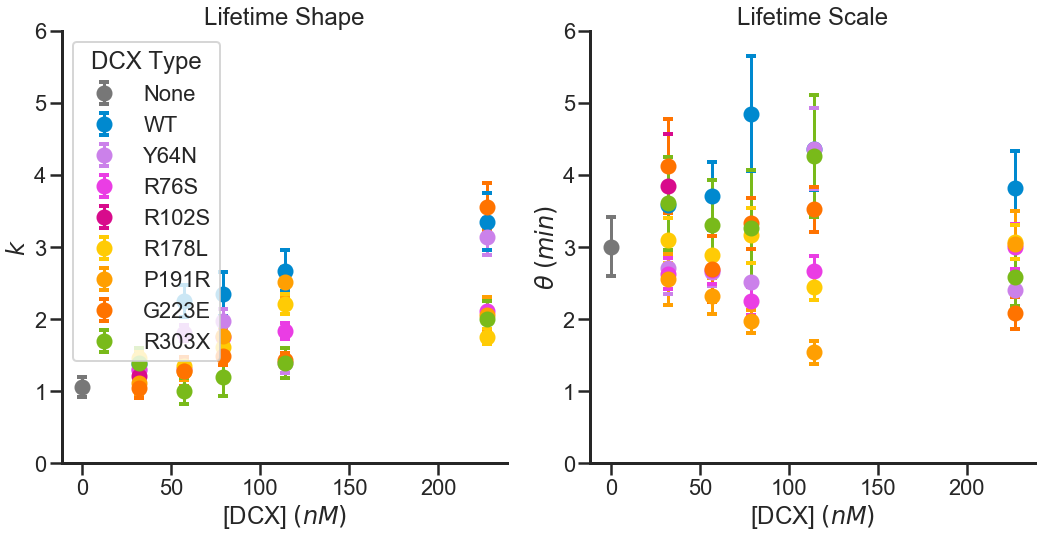

In [44]:
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shronkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

scattersize = 12
cap = 5

fig, ax = plt.subplots(1,2,figsize=(15,8))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
for dcxtype in data[Type].unique():

    x = filter_variable(DCXconc, Type, dcxtype,ResultFit[ResultFit[tubulin]==6])
    
    c=2
    y = filter_parameter(parameters[c], 'Coefficient 0' , Type, dcxtype , 'Value',ResultFit[ResultFit[tubulin]==6])
    yerr = filter_parameter(parameters[c], 'Coefficient 0' , Type, dcxtype , 'SE', ResultFit[ResultFit[tubulin]==6])

    ax[0].errorbar(x , y , yerr= yerr , fmt='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count])
    
    y = filter_parameter(parameters[c], 'Coefficient 1' , Type, dcxtype , 'Value',ResultFit[ResultFit[tubulin]==6])
    yerr = filter_parameter(parameters[c], 'Coefficient 1' , Type, dcxtype , 'SE', ResultFit[ResultFit[tubulin]==6])

    ax[1].errorbar(x , y , yerr= yerr , fmt='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count])

       
    count += 1

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_lw(3)
    ax[i].spines['bottom'].set_lw(3)
    ax[i].set_ylim(0,6)
    ax[i].set_xlabel( DCXconc)


ax[0].set_title('Lifetime Shape')
ax[0].set_ylabel( r'$k$')

ax[1].set_title('Lifetime Scale')
ax[1].set_ylabel( r'$\theta \; (min)$')


ax[0].legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')
plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsFit_lifetimeparms.pdf'))